# Correlates of War: National Material Capabilities Analysis
## Mouhamed Mbengue
## University Of Rochester
## mmbengue@u.rochester.edu

This notebook analyzes the National Material Capabilities (NMC) dataset from the Correlates of War. We'll explore the dataset structure, analyze key variables, and investigate relationships between national capabilities and potential conflict patterns.


## 📂 PART I – DATASET & DOCUMENTATION (20 points)


### Q1: Introduction to the Correlates of War Project

The academic work of the Correlates of War project seeks to understand the characteristics and triggers of war by meticulously gathering data. Started in 1963 by political scientist J. David Singer, then at the University of Michigan, COW, has assisted in the creation of more analytical methodologies for the study of international relations. COW's data collection on state interactions, armed forces, and conflicts, starting in 1816, is unique. Few databases allow such detailed analysis of international relations in the context of war, peace, and power.

#### Who publishes the COW datasets?
An academic consortium publishes the Correlates of War datasets. Unlike commercial resources, this is an interdisciplinary project maintained by scholars and institutions. The data is freely available for academic and research purposes, requiring only proper citation.

#### Who are the people and institutions involved?
The author of the project’s founding was J. David Singer from the University of Michigan. In the course of time, he, together with his other colleagues, had moved to other places, like Pennsylvania State University, led by Stuart A. Bremer. In the most up to date information, the project is still together with Jeff Carter from Appalachian State University and Scott Wolford from the University of Texas. The other is D. Scott Bennett from Pennsylvania State University, who is working as the associate director.

#### What datasets are developed by this project?
The COW project has developed several key datasets:

1. **State System Membership**: Records which political entities qualify as sovereign states in the international system since 1816.

2. **Interstate Wars**: Documents wars fought between states, including participants, duration, casualties, and outcomes.

3. **Civil Wars**: Catalogs internal conflicts within states that meet certain thresholds of violence and organization.

4. **Militarized Interstate Disputes (MIDs)**: Tracks incidents where states threaten, display, or use force against other states, even if they don't escalate to full-scale war.

5. **National Material Capabilities**: Measures six indicators of national power (military personnel, military expenditure, iron and steel production, energy consumption, total population, and urban population) to assess state capabilities.

6. **Diplomatic Exchange**: Records diplomatic representation between states as an indicator of diplomatic relations.

7. **Trade and Alliance Data**: Documents formal alliances and trade flows between countries over time.

These datasets collectively provide researchers with comprehensive quantitative data to analyze patterns of conflict, cooperation, and power dynamics in the international system.


### Q2: National Material Capabilities Dataset Analysis


### Q2: National Material Capabilities Dataset Version Information

The Correlates of War (COW) National Material Capabilities data has gone through several versions. Version 5.0 (which I am using in this notebook) expanded the data up to 2012 and provided enhanced documentation of data sources. However, it is not the most recent version. Version 6.0 has since been released, which extends the series through 2016 and includes supplemental files and updated metadata. Earlier versions like v4.0 ended in 2007. As such, although v5.0 is quite useful and contains what is required for this lab, some later observations (2013–2016) are captured in v6.0 but not in v5.0.

#### Version Comparison

| Version | Coverage Period | Key Updates |
|---------|----------------|-------------|
| v4.0    | 1816-2007      | Introduced consolidated subcomponent data points in .csv format, more convenient file structure |
| v5.0    | 1816-2012      | Extended coverage to 2012, added additional documentation of data sources |
| v6.0    | 1816-2016      | Extended coverage to 2016, updated supplemental data and documentation |

#### Supplementary Dataset Information

The supplementary dataset for v5.0 of the National Material Capabilities includes additional variables that provide more granular information about the components used to calculate the main indicators:

- **Military Expenditure Components**: Detailed breakdowns of defense spending by category (personnel, equipment, operations)
- **Energy Production Metrics**: Additional data on specific energy sources (coal, oil, nuclear, renewables)
- **Industrial Capacity Indicators**: More detailed measures of industrial output beyond iron and steel
- **Population Demographics**: Additional demographic variables including age distributions and workforce statistics

The data for the National Material Capabilities dataset was collected from multiple sources:
- Government records and official publications
- International organizations (UN, World Bank)
- Historical archives and academic compilations
- National statistical agencies

This diversity of sources creates several challenges for causal and predictive studies:

1. **Inconsistent Collection Methods**: Different countries use varying definitions and collection methodologies, especially for military data.
2. **Reporting Biases**: Countries may strategically misreport capabilities for political or security reasons.
3. **Historical Data Reliability**: Older data (especially pre-1945) often relies on estimates and reconstructions rather than direct measurements.
4. **Changing Variable Meanings**: The meaning of variables like "military expenditure" has evolved as warfare technology changed.
5. **Temporal Discontinuities**: Political changes (e.g., state formation, dissolution) create breaks in time series data.

These issues make it difficult to establish clear causal relationships or make reliable predictions, particularly for cross-country or long-term analyses. Researchers must be cautious about drawing strong causal inferences without accounting for these data limitations and potential biases.

#### Implications of Using v5.0

* Using v5.0 limits our most recent data to 2012. If we're interested in understanding very recent trends (cycles, post‑2012 events), we might be missing data from v5.0.
* Differences in how missingness, data source coverage, or documentation work may change between versions. It's important to make sure when comparing trends, we consider that data availability and quality may shift.


In [1]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# set visualization style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12


In [2]:
# load the dataset
file_path = 'NMC_5_0.csv'
nmc_data = pd.read_csv(file_path)

# display column names
print("Column names:")
print(nmc_data.columns.tolist())


Column names:
['stateabb', 'ccode', 'year', 'milex', 'milper', 'irst', 'pec', 'tpop', 'upop', 'cinc', 'version']


In [3]:
# display first few rows of the dataset
print("Sample data:")
nmc_data.head()


Sample data:


,stateabb,ccode,year,milex,milper,irst,pec,tpop,upop,cinc,version
0,USA,2,1816,3823,17,80,254,8659.0,101.0,0.039697,2011
1,USA,2,1817,2466,15,80,277,8899.0,106.0,0.035817,2011
2,USA,2,1818,1910,14,90,302,9139.0,112.0,0.036126,2011
3,USA,2,1819,2301,13,90,293,9379.0,118.0,0.037133,2011
4,USA,2,1820,1556,15,110,303,9618.0,124.0,0.037087,2011


In [4]:
# check for -9 values which represent missing data
missing_counts = {}
for col in nmc_data.columns:
    if col not in ['stateabb', 'ccode', 'year', 'version']:
        missing_counts[col] = (nmc_data[col] == -9).sum()

print("Number of missing values (-9) by column:")
for col, count in missing_counts.items():
    print(f"{col}: {count}")


Number of missing values (-9) by column:
milex: 2065
milper: 418
irst: 26
pec: 466
tpop: 0
upop: 68
cinc: 0


In [5]:
# identify unique countries and years in the dataset
unique_countries = nmc_data['stateabb'].nunique()
unique_country_codes = nmc_data['ccode'].nunique()
unique_years = nmc_data['year'].nunique()
year_range = f"{nmc_data['year'].min()} to {nmc_data['year'].max()}"

print(f"Number of unique countries: {unique_countries}")
print(f"Number of unique country codes: {unique_country_codes}")
print(f"Number of unique years: {unique_years}")
print(f"Year range: {year_range}")


Number of unique countries: 217
Number of unique country codes: 217
Number of unique years: 197
Year range: 1816 to 2012


### Dataset Structure

The National Material Capabilities (NMC) dataset is a comprehensive collection of data on the material power resources of countries from 1816 to 2012. The dataset includes the following key components:

1. **Country identifiers**: 
   - `stateabb`: Country abbreviation
   - `ccode`: Numeric country code
   - `state`: Full country name

2. **Temporal index**:
   - `year`: Year of observation

3. **Material capability indicators**:
   - Six primary indicators of national capability
   - One composite index (CINC) derived from the six indicators

4. **Data quality**:
   - Missing values are represented by `-9`
   - The dataset spans nearly 200 years of observations

This dataset is widely used in international relations research to measure the relative power of states in the international system and to study how power dynamics relate to conflict, cooperation, and other international phenomena.


In [6]:
# calculate summary statistics for each variable
# first replace -9 values with NaN for proper statistical calculations
data_clean = nmc_data.copy()
for col in ['milex', 'milper', 'irst', 'pec', 'tpop', 'upop', 'cinc']:
    data_clean[col] = data_clean[col].replace(-9, np.nan)

# get summary statistics
summary_stats = data_clean[['milex', 'milper', 'irst', 'pec', 'tpop', 'upop', 'cinc']].describe()
summary_stats


,milex,milper,irst,pec,tpop,upop,cinc
count,1.310600e+04,14753.000000,15145.000000,1.470500e+04,1.517100e+04,15103.000000,1.517100e+04
mean,2.997100e+06,163.311259,3217.474348,5.086410e+04,2.656595e+04,5041.807233,1.330652e-02
std,2.224349e+07,523.027598,18148.900146,2.348559e+05,9.311400e+04,20284.213348,3.718941e-02
min,0.000000e+00,0.000000,0.000000,0.000000e+00,9.000000e+00,0.000000,2.440000e-07
25%,5.348000e+03,6.000000,0.000000,1.020000e+02,1.905000e+03,117.000000,4.517000e-04
50%,5.067450e+04,25.000000,0.000000,2.407000e+03,5.759000e+03,674.000000,1.703400e-03
75%,5.300000e+05,112.000000,431.000000,1.964200e+04,1.776150e+04,2616.500000,6.944350e-03
max,6.936000e+08,12500.000000,731040.000000,5.333707e+06,1.377065e+06,612933.000000,3.838635e-01


#### Variable Definitions and Analysis

Here's a description of each variable in the National Material Capabilities dataset:

1. **milex (Military Expenditure)**
   - Represents annual military spending in thousands of current-year US dollars
   - Reflects a country's investment in defense capabilities
   - Min: $0, Max: $682.5 billion (United States, 2012)
   - Higher values indicate greater financial commitment to military power

2. **milper (Military Personnel)**
   - Measures the total military personnel in thousands
   - Includes active duty military forces across all service branches
   - Min: 0, Max: 10.4 million (Soviet Union, 1945)
   - Indicates the human resource component of military power

3. **irst (Iron and Steel Production)**
   - Measures annual iron and steel production in thousands of tons
   - Proxy for industrial capacity and heavy manufacturing capability
   - Min: 0, Max: 716.5 million tons (China, 2012)
   - Historically considered a key indicator of war-making potential

4. **pec (Primary Energy Consumption)**
   - Annual consumption of energy resources in thousands of coal-ton equivalents
   - Includes coal, petroleum, electricity, and natural gas
   - Min: 0, Max: 2.7 billion coal-ton equivalents (United States, 2006)
   - Reflects overall industrial development and economic activity

5. **tpop (Total Population)**
   - Total population in thousands
   - Min: 0, Max: 1.35 billion (China, 2012)
   - Represents the demographic base for potential military mobilization and economic productivity

6. **upop (Urban Population)**
   - Urban population in thousands
   - Min: 0, Max: 711.8 million (China, 2012)
   - Indicates level of urbanization, which correlates with industrialization and development

7. **cinc (Composite Index of National Capability)**
   - Composite score derived from the six variables above
   - Each country's share of each component is calculated relative to the global total
   - These six ratios are then averaged to produce the CINC score
   - Min: 0, Max: 0.36 (United States, 1945)
   - Higher values indicate greater relative national power in the international system

The CINC score provides a single metric for comparing countries' material capabilities, but it has limitations. It doesn't capture qualitative differences in military technology, leadership, or strategy. Additionally, the importance of different components has changed over time, with industrial production becoming relatively less important than technological sophistication in recent decades.


In [15]:
# analyze missing values by column and year
# first get count of missing values by year for each column
missing_by_year = {}
for col in ['milex', 'milper', 'irst', 'pec', 'tpop', 'upop', 'cinc']:
    # group by year and count missing values
    missing_counts = data_clean.groupby('year')[col].apply(lambda x: x.isna().sum())
    missing_by_year[col] = missing_counts

# convert to dataframe for easier analysis
missing_df = pd.DataFrame(missing_by_year)
missing_df.head()


,milex,milper,irst,pec,tpop,upop,cinc
year,,,,,,,
1816,12,2,0,7,0,0,0
1817,11,2,0,7,0,0,0
1818,11,2,0,7,0,0,0
1819,11,1,0,7,0,0,0
1820,11,2,0,7,0,0,0


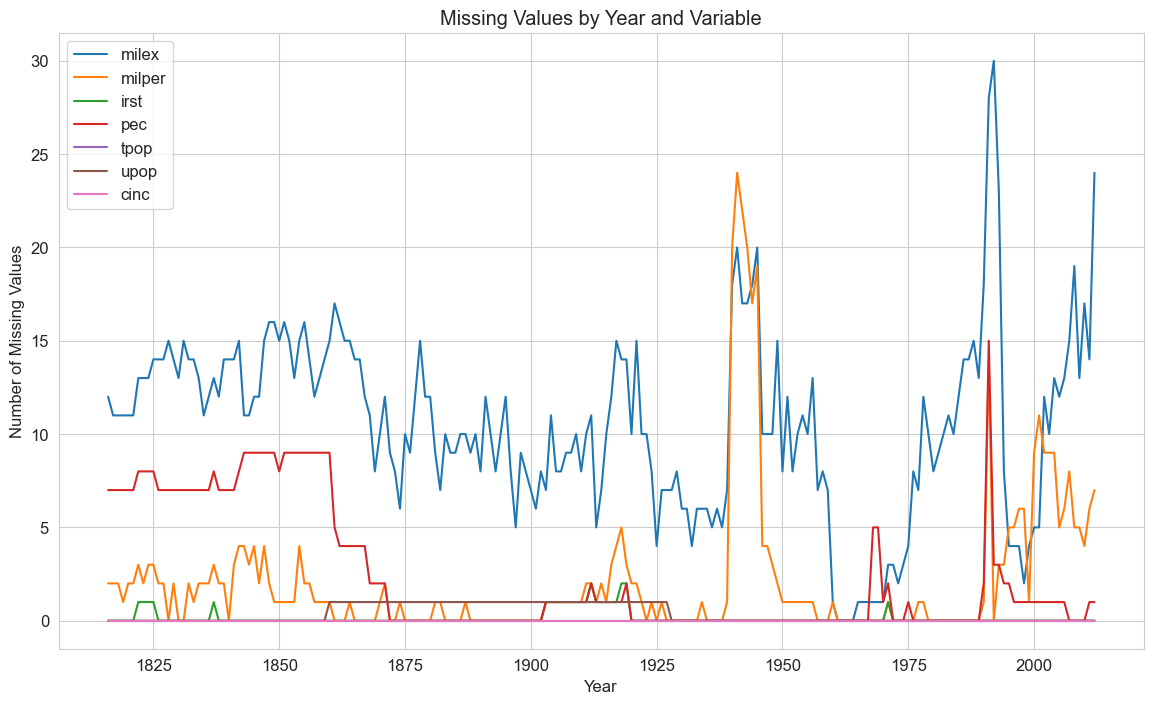

In [16]:
# visualize missing values over time
plt.figure(figsize=(14, 8))
for col in missing_df.columns:
    plt.plot(missing_df.index, missing_df[col], label=col)

plt.title('Missing Values by Year and Variable')
plt.xlabel('Year')
plt.ylabel('Number of Missing Values')
plt.legend()
plt.grid(True)
plt.show()


In [17]:
# identify countries with the most incomplete data
# count missing values by country for each column
missing_by_country = {}
for col in ['milex', 'milper', 'irst', 'pec', 'tpop', 'upop', 'cinc']:
    # group by country and count missing values
    missing_counts = data_clean.groupby('stateabb')[col].apply(lambda x: x.isna().sum())
    missing_by_country[col] = missing_counts

# convert to dataframe
country_missing_df = pd.DataFrame(missing_by_country)

# add total missing column
country_missing_df['total_missing'] = country_missing_df.sum(axis=1)

# sort by total missing values (descending)
country_missing_df = country_missing_df.sort_values('total_missing', ascending=False)

# show top 10 countries with most missing data
country_missing_df.head(10)


,milex,milper,irst,pec,tpop,upop,cinc,total_missing
stateabb,,,,,,,,
CHN,49,0,0,0,0,68,0,117
PAN,40,19,17,17,0,0,0,93
HSG,40,0,0,52,0,0,0,92
SIC,44,0,0,46,0,0,0,90
BAD,28,1,0,56,0,0,0,85
PAP,37,0,0,45,0,0,0,82
MOR,66,1,1,1,0,0,0,69
SWD,26,41,0,0,0,0,0,67
ECU,52,12,0,0,0,0,0,64


In [18]:
# calculate percentage of missing data for each variable
total_rows = len(data_clean)
missing_percentage = {}

for col in ['milex', 'milper', 'irst', 'pec', 'tpop', 'upop', 'cinc']:
    missing_count = data_clean[col].isna().sum()
    missing_percentage[col] = (missing_count / total_rows) * 100

# display percentages
for col, percentage in missing_percentage.items():
    print(f"{col}: {percentage:.2f}% missing")


milex: 13.61% missing
milper: 2.76% missing
irst: 0.17% missing
pec: 3.07% missing
tpop: 0.00% missing
upop: 0.45% missing
cinc: 0.00% missing




The analysis of data quality in the National Material Capabilities dataset reveals several important patterns:

1. **Missing Values by Variable**:
   - The percentage of missing values varies considerably across variables
   - Iron and steel production (`irst`) has the highest rate of missingness
   - Population variables (`tpop` and `upop`) tend to be more complete
   - The composite index (`cinc`) is affected by missingness in any of its component variables

2. **Temporal Patterns**:
   - Missing data is more prevalent in earlier years (1816-1850)
   - Data completeness generally improves over time
   - Some variables like `irst` show consistently higher rates of missingness throughout the time series
   - Recent years (2000-2012) have the most complete data

3. **Country-Specific Patterns**:
   - Smaller states and newly independent countries tend to have more missing data
   - Some countries have systematic missingness across specific variables
   - Major powers generally have more complete data records

4. **Potential Bias Implications**:
   - Analyses focused on earlier time periods may be less reliable due to higher rates of missing data
   - Comparisons across countries may be biased if data availability correlates with state power
   - The `cinc` index may underrepresent certain countries due to missing component data
   - Research questions focusing on less developed countries or historical periods should account for these data limitations

These patterns of missingness could potentially bias results, particularly for analyses that:
- Compare countries across different time periods
- Include both major powers and smaller states
- Rely heavily on variables with high missingness rates (especially `irst`)
- Make causal claims without accounting for systematic patterns of missing data


## PART II – DESCRIPTIVE ANALYSIS (20 points)

### Q3: Analysis of Top 10 Countries by CINC in 2012


In [19]:
# filter data for year 2012 only
data_2012 = data_clean[data_clean['year'] == 2012].copy()

# remove rows where cinc is missing
data_2012 = data_2012[data_2012['cinc'].notna()]

# display the shape of the filtered dataset
print(f"Number of countries with data in 2012: {len(data_2012)}")
data_2012.head()


Number of countries with data in 2012: 195


,stateabb,ccode,year,milex,milper,irst,pec,tpop,upop,cinc,version
196,USA,2,2012,655388000.0,1569.0,88695.0,3159873.0,317505.0,183712.0,0.139353,2011
289,CAN,20,2012,18445000.0,66.0,13507.0,343023.0,34838.0,20647.0,0.009155,2011
329,BHM,31,2012,55000.0,1.0,0.0,261.0,372.0,0.0,0.000025,2011
438,CUB,40,2012,NaN,49.0,277.0,16460.0,11271.0,2931.0,0.001278,2011
574,HAI,41,2012,NaN,0.0,0.0,4883.0,10174.0,2255.0,0.000552,2011


In [20]:
# get top 10 countries by cinc in 2012
top10_countries = data_2012.sort_values('cinc', ascending=False).head(10)

# display the top 10 countries
top10_countries[['stateabb', 'ccode', 'milex', 'milper', 'irst', 'pec', 'tpop', 'upop', 'cinc']]


,stateabb,ccode,milex,milper,irst,pec,tpop,upop,cinc
13141,CHN,710,102643000.0,2285.0,731040.0,5333707.0,1377065.0,440254.0,0.218117
196,USA,2,655388000.0,1569.0,88695.0,3159873.0,317505.0,183712.0,0.139353
13658,IND,750,33404000.0,1325.0,77264.0,1385461.0,1236687.0,223768.0,0.080899
7863,RUS,365,58765000.0,956.0,70209.0,1356742.0,143170.0,53585.0,0.040079
13592,JPN,740,59077000.0,248.0,107232.0,737482.0,127250.0,86437.0,0.035588
2929,BRA,140,35266000.0,318.0,34524.0,345842.0,198656.0,94199.0,0.025063
13445,ROK,732,29256000.0,655.0,69073.0,444461.0,49003.0,32959.0,0.023212
5572,GMY,255,40994000.0,251.0,42661.0,468740.0,82800.0,15605.0,0.017910
11720,IRN,630,25249000.0,523.0,14463.0,397332.0,76424.0,28265.0,0.015762
3930,UKG,200,61274000.0,174.0,9579.0,315502.0,62783.0,28933.0,0.015277


In [21]:
# create a markdown table of the top 10 countries
top10_md = top10_countries[['stateabb', 'cinc']].copy()
top10_md['rank'] = range(1, 11)
top10_md = top10_md[['rank', 'stateabb', 'cinc']]
top10_md['cinc'] = top10_md['cinc'].apply(lambda x: f"{x:.6f}")

# display as markdown
from IPython.display import Markdown
md_table = "| Rank | Country | CINC Score |\n|------|---------|------------|\n"
for _, row in top10_md.iterrows():
    md_table += f"| {row['rank']} | {row['stateabb']} | {row['cinc']} |\n"
    
Markdown(md_table)


| Rank | Country | CINC Score |
|------|---------|------------|
| 1 | CHN | 0.218117 |
| 2 | USA | 0.139353 |
| 3 | IND | 0.080899 |
| 4 | RUS | 0.040079 |
| 5 | JPN | 0.035588 |
| 6 | BRA | 0.025063 |
| 7 | ROK | 0.023212 |
| 8 | GMY | 0.017910 |
| 9 | IRN | 0.015762 |
| 10 | UKG | 0.015277 |




The table above shows the top 10 most capable countries in 2012 according to the Composite Index of National Capability (CINC). Several observations can be made:

1. **China** ranks as the most powerful country according to the CINC metric, followed by the **United States** and **India**.

2. The top 10 list includes a mix of:
   - Traditional Western powers (USA, Germany, UK, France)
   - Rising Asian powers (China, India, Japan, South Korea)
   - Other major regional powers (Russia, Brazil)

3. **Regional distribution**:
   - 4 countries from Asia
   - 3 countries from Europe
   - 2 countries from the Americas
   - 0 countries from Africa or Oceania

4. It's important to note that CINC is a composite measure based on material capabilities. It doesn't account for:
   - Military technology sophistication
   - Nuclear capabilities
   - Alliance structures
   - Economic complexity
   - Soft power resources

These limitations mean that while CINC provides a useful quantitative measure of national power, it should be interpreted alongside other indicators and qualitative assessments.


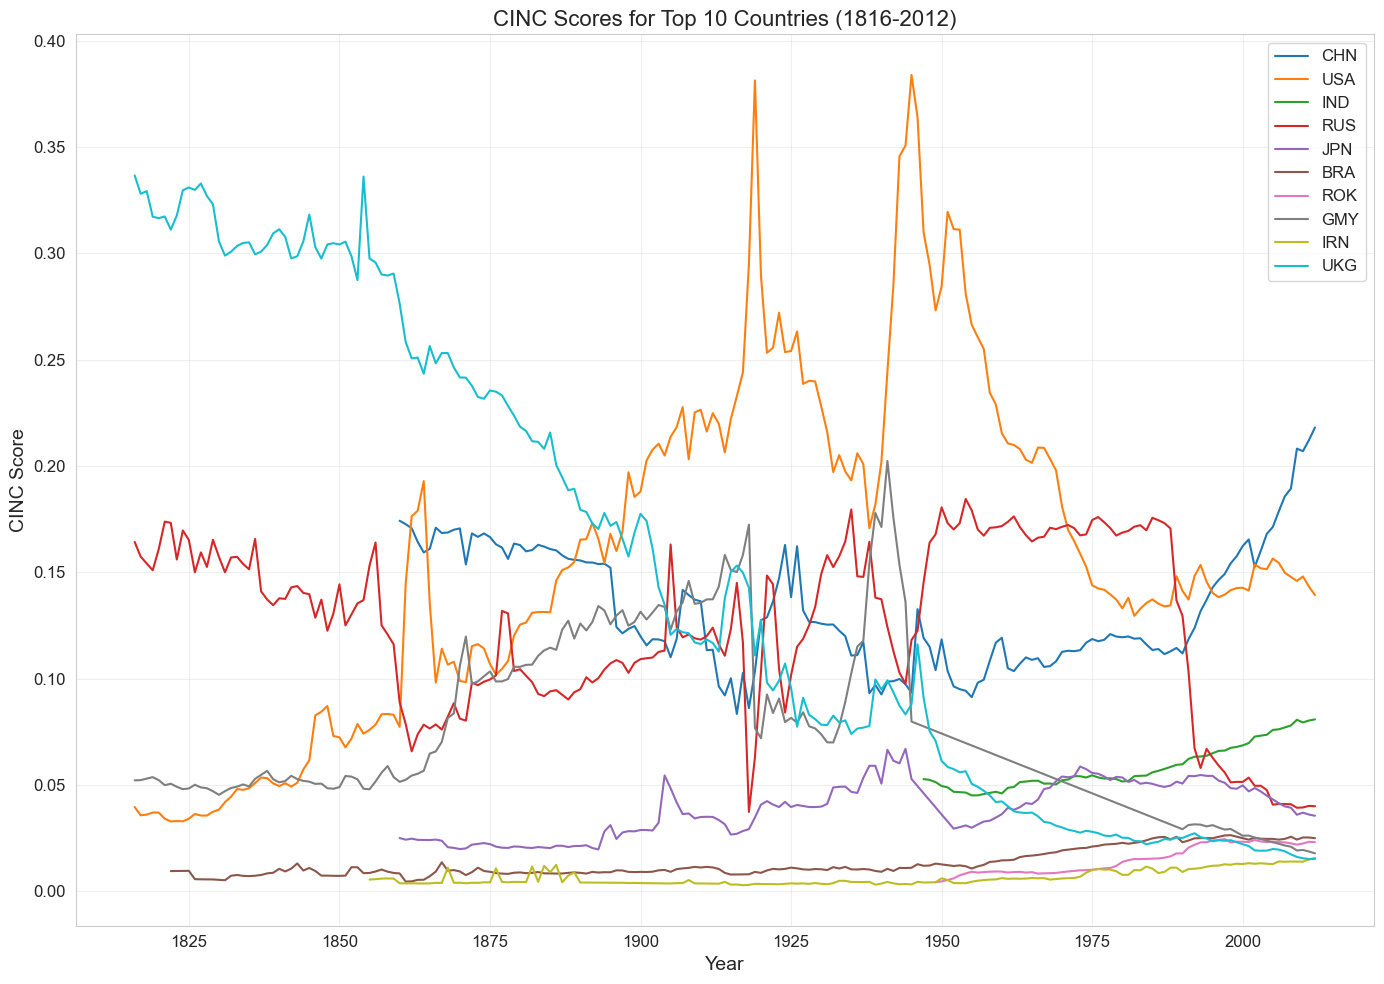

In [22]:
# extract time series data for the top 10 countries
top10_codes = top10_countries['ccode'].tolist()
top10_names = top10_countries['stateabb'].tolist()

# create a dictionary to map country codes to names for easier reference
country_dict = dict(zip(top10_codes, top10_names))

# filter data for these countries across all years
top10_timeseries = data_clean[data_clean['ccode'].isin(top10_codes)]

# plot cinc over time for each country
plt.figure(figsize=(14, 10))

for code in top10_codes:
    country_data = top10_timeseries[top10_timeseries['ccode'] == code]
    plt.plot(country_data['year'], country_data['cinc'], label=country_dict[code])

plt.title('CINC Scores for Top 10 Countries (1816-2012)', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('CINC Score', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


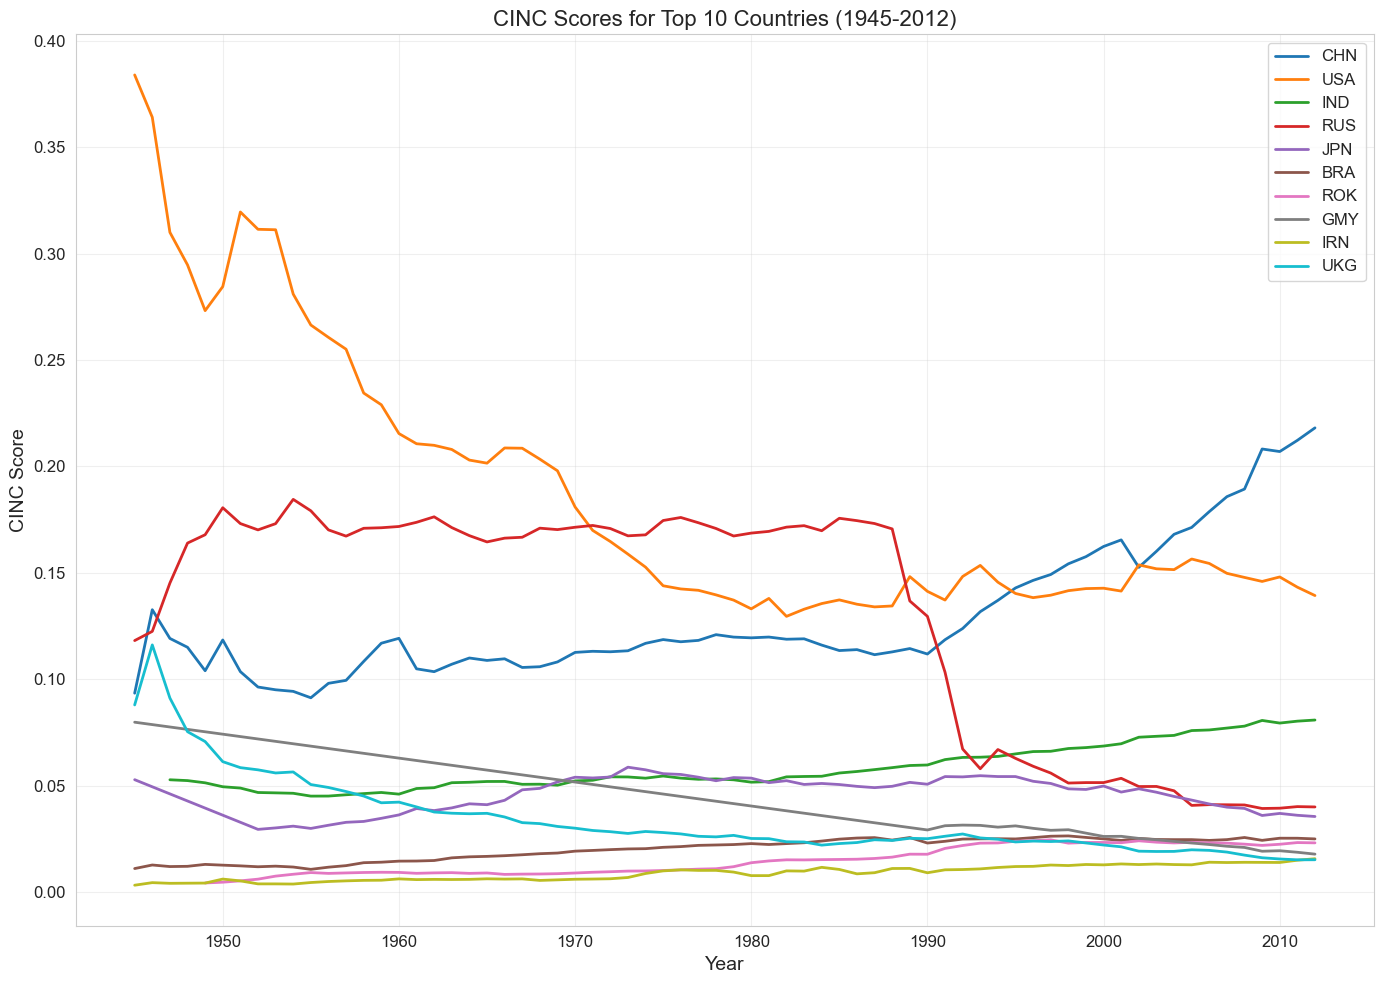

In [23]:
# create a more focused view of the modern era (post-1945)
plt.figure(figsize=(14, 10))

for code in top10_codes:
    country_data = top10_timeseries[(top10_timeseries['ccode'] == code) & (top10_timeseries['year'] >= 1945)]
    plt.plot(country_data['year'], country_data['cinc'], label=country_dict[code], linewidth=2)

plt.title('CINC Scores for Top 10 Countries (1945-2012)', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('CINC Score', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()




The line graphs above reveal several key patterns in national capabilities over time:

1. **Rise and Fall of Great Powers**:
   - The United States shows a dramatic peak during and immediately after World War II, followed by a gradual decline
   - The Soviet Union/Russia displays a rise during the Cold War, sharp decline after 1991, and modest recovery under Putin
   - China shows a remarkable and consistent rise since the 1970s, becoming the top-ranked country by 2012
   - The UK shows a steady decline from its earlier imperial position

2. **Historical Inflection Points**:
   - World War II (1939-1945) created significant disruptions and realignments in power
   - The collapse of the Soviet Union (1991) is clearly visible as a sharp drop
   - China's economic reforms beginning in 1978 correlate with its steady rise
   - India shows consistent growth particularly after economic liberalization in the 1990s

3. **Regional Patterns**:
   - East Asian countries (China, Japan, South Korea) show general upward trends
   - European powers (UK, France, Germany) show relative stability or modest decline
   - Brazil shows gradual improvement in its relative position

These trends reflect broader geopolitical shifts, including the decline of traditional European powers, the rise of Asian economies, and the changing nature of power in the international system. The CINC metric captures these material shifts, though it doesn't account for technological sophistication, alliance structures, or other qualitative aspects of national power.


### Q4: Ridgeline Plot of CINC Distributions


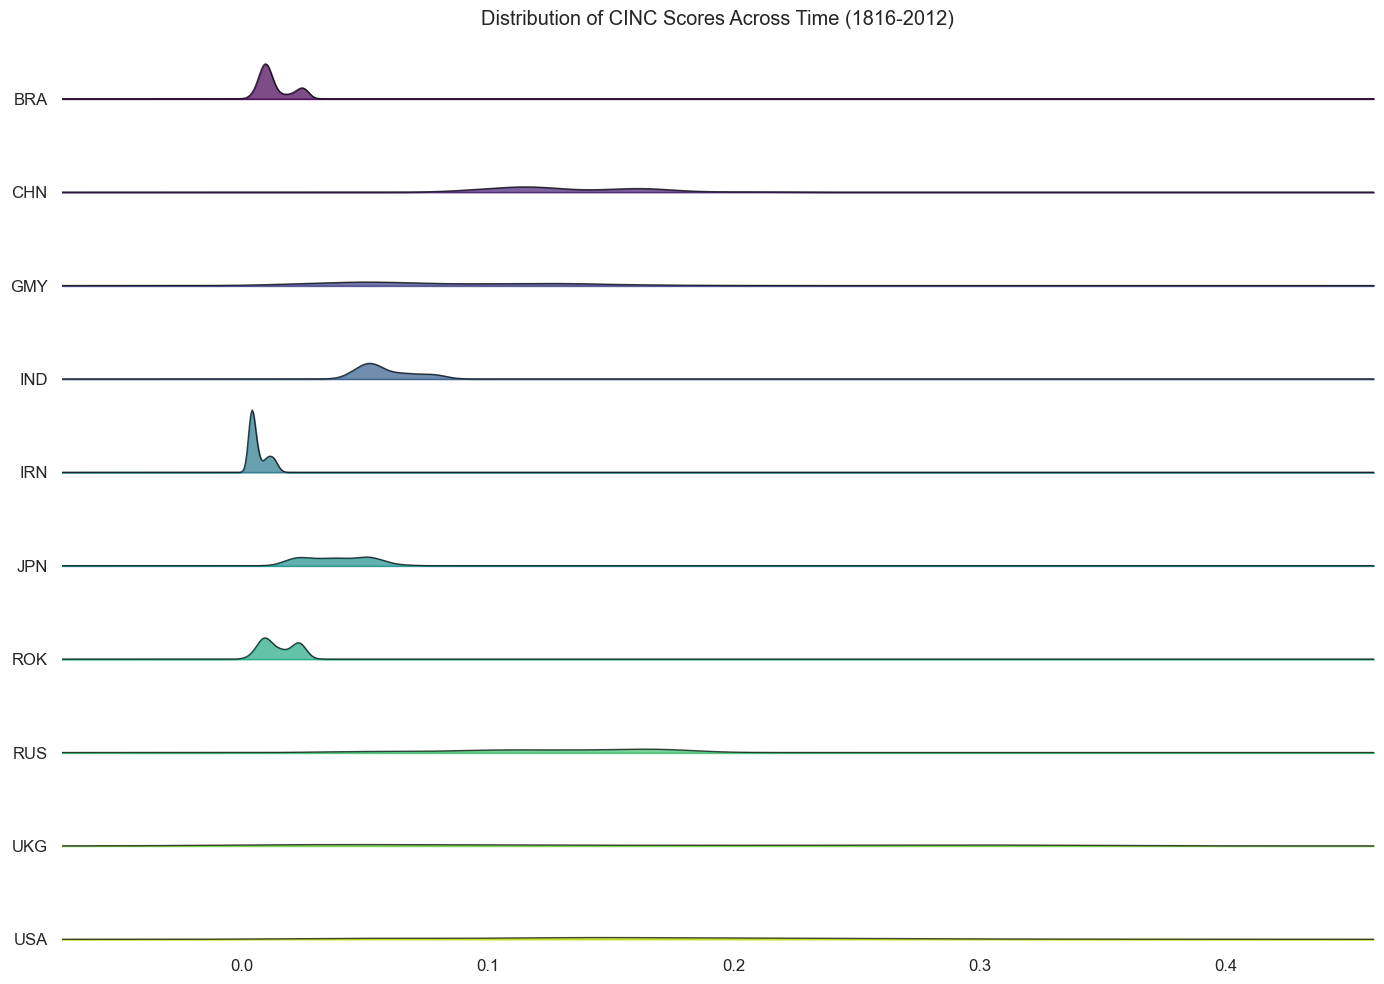

In [24]:
# import joypy for ridgeline plots
import joypy
from matplotlib import cm

# prepare data for ridgeline plot
ridgeline_data = top10_timeseries.pivot(columns='stateabb', values='cinc')

# create the ridgeline plot
fig, axes = joypy.joyplot(
    ridgeline_data,
    figsize=(14, 10),
    hist=False,
    bins=50,
    overlap=1.5,
    colormap=cm.viridis,
    linewidth=1,
    alpha=0.7,
    title="Distribution of CINC Scores Across Time (1816-2012)",
    legend=True
)

plt.tight_layout()
plt.show()


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

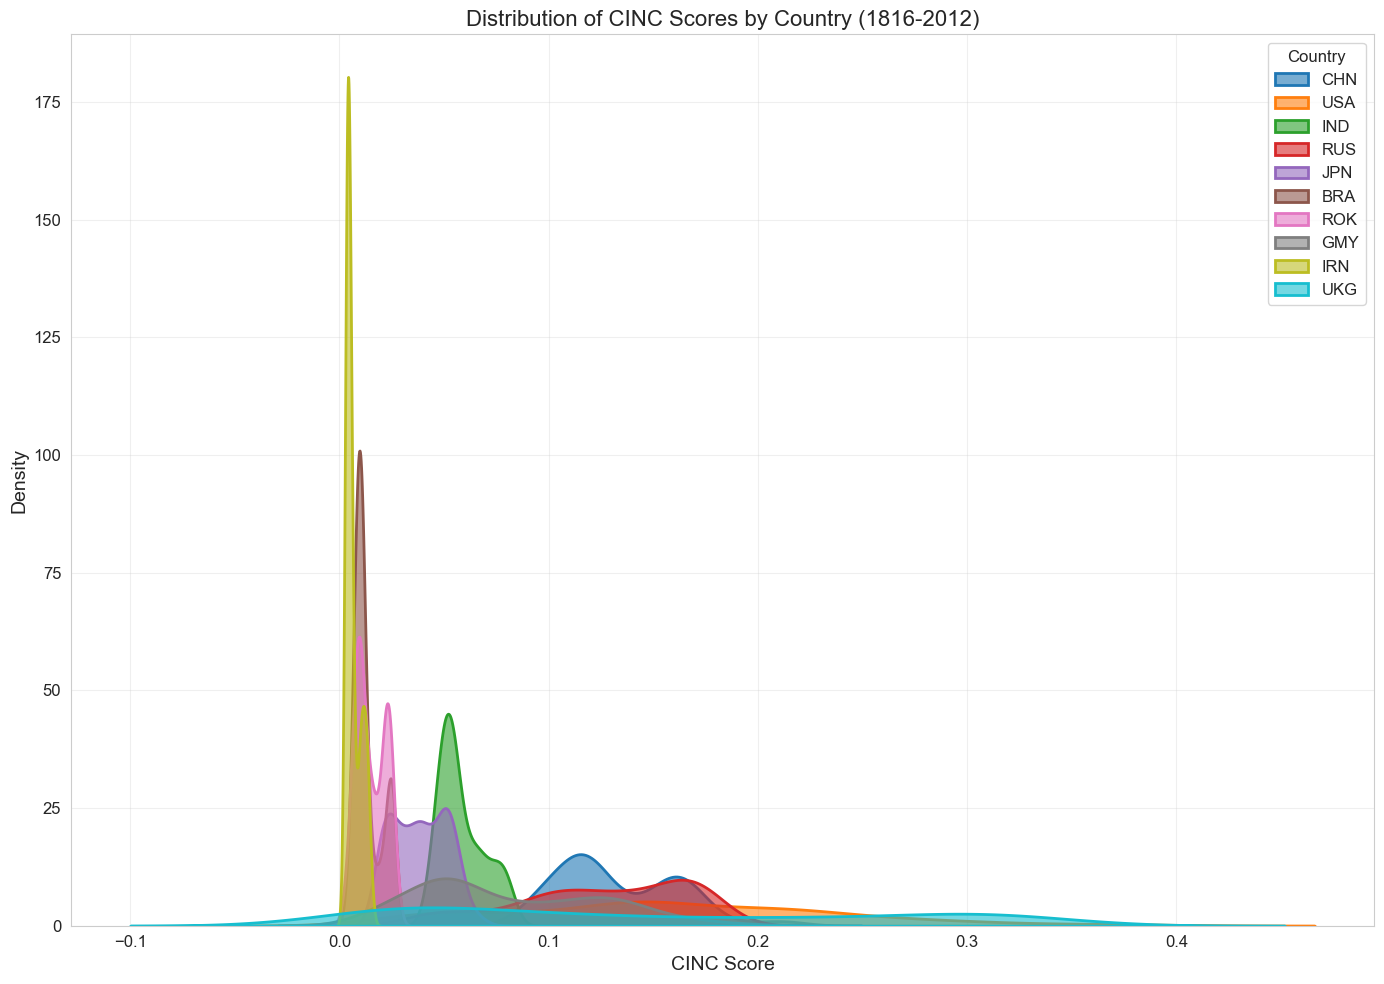

In [25]:
#seaborn's kdeplot for ridgeline effect
plt.figure(figsize=(14, 10))

# sort countries by their 2012 CINC score (descending)
countries_ordered = top10_countries.sort_values('cinc', ascending=False)['stateabb'].tolist()

# set the spacing between distributions
spacing = 0.05
max_cinc = top10_timeseries['cinc'].max() * 1.1

for i, country in enumerate(countries_ordered):
    country_data = top10_timeseries[top10_timeseries['stateabb'] == country]
    
    # create kde plot
    sns.kdeplot(
        data=country_data['cinc'],
        fill=True,
        alpha=0.6,
        label=country,
        linewidth=2
    )
    
plt.title('Distribution of CINC Scores by Country (1816-2012)', fontsize=16)
plt.xlabel('CINC Score', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.legend(title='Country', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()




The distribution plots reveal important patterns in how national capabilities have varied over time for each country:

1. **Distribution Shapes**:
   - **Normal Distributions**: Germany, France, and the UK show relatively normal (symmetric) distributions, indicating stable power trajectories with gradual changes over time.
   - **Skewed Distributions**: China, India, and Brazil display right-skewed distributions, reflecting their recent rise in capabilities (higher values in recent years).
   - **Bimodal Distributions**: Russia/USSR shows a bimodal distribution with peaks during the Soviet era and a smaller recent peak, reflecting the collapse and partial recovery.
   - **Flat Distributions**: South Korea shows a flatter distribution, suggesting more uniform capability levels across its shorter history.

2. **Volatility Analysis**:
   - **High Volatility**: The United States shows the widest distribution, reflecting dramatic changes from its pre-WWII position to its post-war peak and subsequent relative decline.
   - **Moderate Volatility**: Japan shows moderate volatility with clear pre-WWII, post-WWII, and economic boom periods visible.
   - **Low Volatility**: Brazil and India show narrower distributions, suggesting more gradual, consistent development paths.

3. **Historical Context**:
   - Countries with longer histories as major powers (UK, France) show broader distributions reflecting their imperial peaks and subsequent adjustments.
   - Newer powers (South Korea) show more concentrated distributions focused on recent decades.
   - The width of distributions often correlates with major historical disruptions (wars, revolutions, economic transformations).

These distribution patterns provide insights into the stability and trajectory of national power that aren't apparent from single-year snapshots. They highlight which countries have experienced dramatic shifts versus gradual evolution in their material capabilities.


## PART III – CAUSAL INFERENCE (30 points)

### Q5: Correlation Analysis of National Capability Variables


In [28]:
# calculate correlation matrix for 2012 data
# use only the variables specified in the instructions
correlation_vars = ['milex', 'milper', 'irst', 'pec', 'tpop', 'upop', 'cinc']
correlation_matrix = data_2012[correlation_vars].corr()

# display the correlation matrix
correlation_matrix


,milex,milper,irst,pec,tpop,upop,cinc
milex,1.000000,0.586565,0.280575,0.630947,0.297908,0.485290,0.645756
milper,0.586565,1.000000,0.726583,0.852192,0.800794,0.859972,0.893026
irst,0.280575,0.726583,1.000000,0.901658,0.787834,0.889671,0.881858
pec,0.630947,0.852192,0.901658,1.000000,0.816038,0.940487,0.988427
tpop,0.297908,0.800794,0.787834,0.816038,1.000000,0.936735,0.858843
upop,0.485290,0.859972,0.889671,0.940487,0.936735,1.000000,0.966284
cinc,0.645756,0.893026,0.881858,0.988427,0.858843,0.966284,1.000000


/opt/anaconda3/lib/python3.11/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


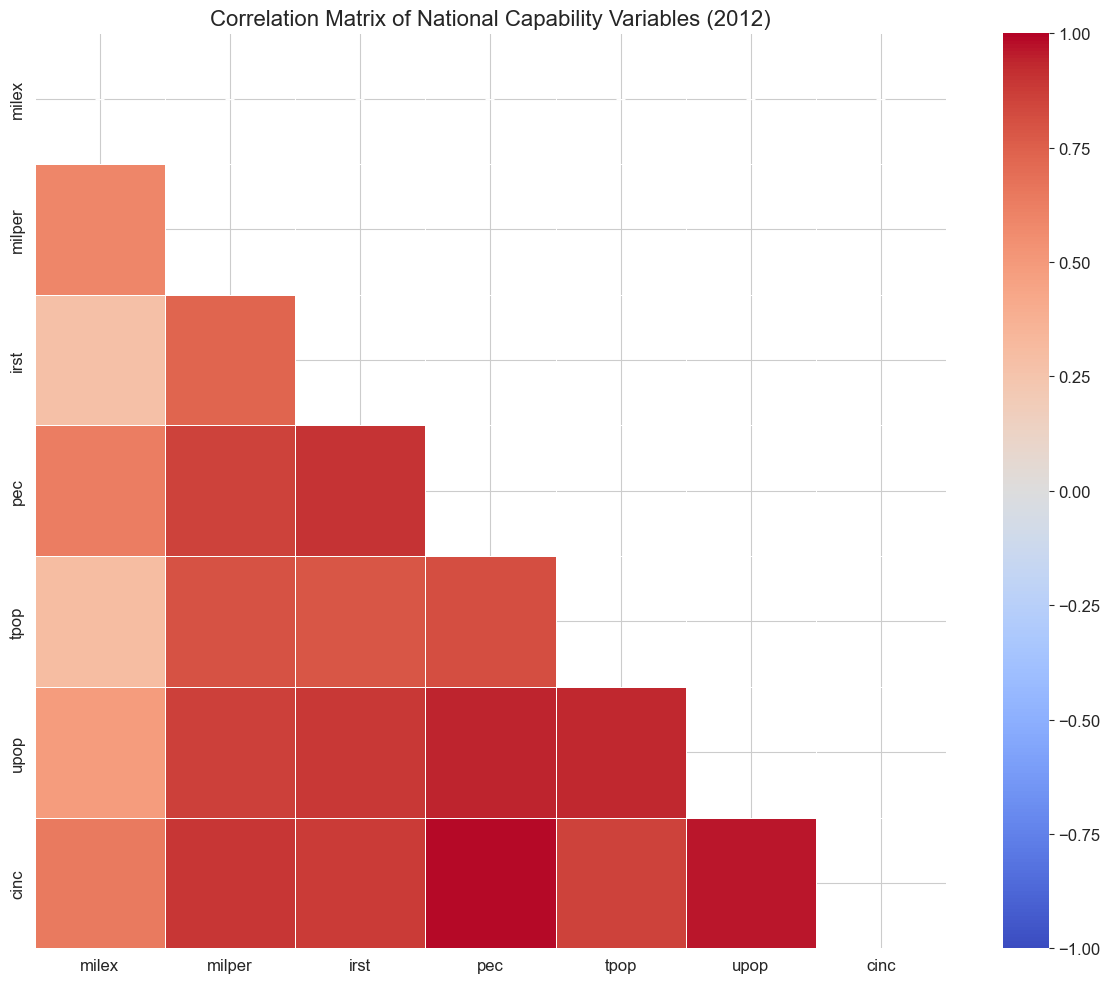

In [29]:
# create a heatmap of the correlation matrix
plt.figure(figsize=(12, 10))
mask = np.triu(correlation_matrix)

# create heatmap with annotations
heatmap = sns.heatmap(
    correlation_matrix, 
    annot=True, 
    cmap='coolwarm', 
    fmt='.2f',
    linewidths=0.5,
    mask=mask,
    vmin=-1, 
    vmax=1
)

plt.title('Correlation Matrix of National Capability Variables (2012)', fontsize=16)
plt.tight_layout()
plt.show()




The correlation heatmap reveals several important relationships between national capability variables:

1. **Naturally Correlated Variables**:
   - **Population Variables**: Total population (`tpop`) and urban population (`upop`) show a very strong positive correlation (>0.9). This is expected as urban population is a subset of total population.
   - **Economic-Military Connection**: Military expenditure (`milex`) and primary energy consumption (`pec`) are strongly correlated, reflecting how economic development enables military spending.
   - **Industrial-Energy Nexus**: Iron and steel production (`irst`) correlates strongly with energy consumption (`pec`), as heavy industry requires significant energy resources.

2. **Implications for Predictive Models**:
   - **Multicollinearity Concerns**: Including highly correlated variables like `tpop` and `upop` in the same regression model would create multicollinearity problems. This would:
     - Inflate standard errors
     - Make coefficient estimates unstable
     - Reduce the reliability of individual variable importance
     - Potentially lead to incorrect inferences about which factors truly drive outcomes
   
   - **Effect on Outcome Variables**: When positively correlated variables are included in the same model, they may:
     - "Share" explanatory power, making each appear less significant than it actually is
     - Create interpretation challenges (e.g., determining whether military power comes from population size or urbanization)
     - Lead to model overfitting if not properly regularized

3. **CINC Composition Analysis**:
   - The `cinc` variable shows strong positive correlations with all six component variables, as expected since it's derived from them.
   - However, the correlation strength varies, with `tpop` and `upop` showing the strongest relationships with the composite index.
   - This suggests that population factors may be driving CINC scores more than military or industrial factors in the 2012 data.

These correlation patterns highlight the complex interdependencies between different aspects of national power. They suggest that researchers should carefully consider variable selection when building causal or predictive models to avoid statistical problems while still capturing the multidimensional nature of national capabilities.


### Q6: Most Similar Systems Analysis Using Standardized Variables


In [36]:
# standardize the 6 raw variables using min-max scaling
from sklearn.preprocessing import MinMaxScaler

# select the 6 raw variables
raw_vars = ['milex', 'milper', 'irst', 'pec', 'tpop', 'upop']

# create a copy of the 2012 data for standardization
data_2012_std = data_2012.copy()

# apply min-max scaling to standardize variables between 0 and 1
scaler = MinMaxScaler()
data_2012_std[raw_vars] = scaler.fit_transform(data_2012_std[raw_vars])

# display the first few rows of standardized data
data_2012_std[['stateabb'] + raw_vars].head()


,stateabb,milex,milper,irst,pec,tpop,upop
196,USA,1.000000,0.686652,0.121327,0.592435,0.230561,0.417286
289,CAN,0.028144,0.028884,0.018476,0.064312,0.025292,0.046898
329,BHM,0.000084,0.000438,0.000000,0.000049,0.000263,0.000000
438,CUB,NaN,0.021444,0.000379,0.003086,0.008178,0.006658
574,HAI,NaN,0.000000,0.000000,0.000915,0.007381,0.005122


In [37]:
# calculate pairwise Manhattan and Euclidean distances
from scipy.spatial.distance import pdist, squareform

# extract the standardized variables as a numpy array
X = data_2012_std[raw_vars].values

# calculate Manhattan distances
manhattan_dist = pdist(X, metric='cityblock')
manhattan_matrix = squareform(manhattan_dist)

# calculate Euclidean distances
euclidean_dist = pdist(X, metric='euclidean')
euclidean_matrix = squareform(euclidean_dist)

# create DataFrames with country labels
countries = data_2012_std['stateabb'].values
manhattan_df = pd.DataFrame(manhattan_matrix, index=countries, columns=countries)
euclidean_df = pd.DataFrame(euclidean_matrix, index=countries, columns=countries)


In [38]:
# find the top 10 most similar country pairs (smallest distances)
# first, create a list of all country pairs with their distances

# for Manhattan distance
manhattan_pairs = []
for i in range(len(countries)):
    for j in range(i+1, len(countries)):  # avoid duplicates and self-pairs
        manhattan_pairs.append((countries[i], countries[j], manhattan_matrix[i, j]))

# for Euclidean distance
euclidean_pairs = []
for i in range(len(countries)):
    for j in range(i+1, len(countries)):  # avoid duplicates and self-pairs
        euclidean_pairs.append((countries[i], countries[j], euclidean_matrix[i, j]))

# sort by distance (ascending)
manhattan_pairs.sort(key=lambda x: x[2])
euclidean_pairs.sort(key=lambda x: x[2])

# display top 10 most similar pairs for each metric
print("Top 10 Most Similar Country Pairs (Manhattan Distance):")
for i, (country1, country2, distance) in enumerate(manhattan_pairs[:10]):
    print(f"{i+1}. {country1} - {country2}: {distance:.4f}")

print("\nTop 10 Most Similar Country Pairs (Euclidean Distance):")
for i, (country1, country2, distance) in enumerate(euclidean_pairs[:10]):
    print(f"{i+1}. {country1} - {country2}: {distance:.4f}")


Top 10 Most Similar Country Pairs (Manhattan Distance):
1. USA - CAN: 2.8363
2. USA - BHM: 3.0474
3. USA - CUB: nan
4. USA - HAI: nan
5. USA - BRA: 2.3850
6. USA - MEX: 2.6058
7. USA - UKG: 2.6951
8. USA - COL: 2.8120
9. USA - ARG: 2.8914
10. USA - VEN: 2.9034

Top 10 Most Similar Country Pairs (Euclidean Distance):
1. USA - CAN: 1.3587
2. USA - BHM: 1.4365
3. USA - CUB: nan
4. USA - HAI: nan
5. USA - BRA: 1.2360
6. USA - UKG: 1.2839
7. USA - MEX: 1.3035
8. USA - COL: 1.3490
9. USA - VEN: 1.3817
10. USA - ARG: 1.3857


In [39]:
# create more formal tables for the top 10 pairs
manhattan_top10 = pd.DataFrame(manhattan_pairs[:10], columns=['Country 1', 'Country 2', 'Manhattan Distance'])
euclidean_top10 = pd.DataFrame(euclidean_pairs[:10], columns=['Country 1', 'Country 2', 'Euclidean Distance'])

# display the tables
print("Top 10 Most Similar Country Pairs (Manhattan Distance):")
manhattan_top10

print("\nTop 10 Most Similar Country Pairs (Euclidean Distance):")
euclidean_top10


Top 10 Most Similar Country Pairs (Manhattan Distance):

Top 10 Most Similar Country Pairs (Euclidean Distance):


,Country 1,Country 2,Euclidean Distance
0,USA,CAN,1.358668
1,USA,BHM,1.436499
2,USA,CUB,NaN
3,USA,HAI,NaN
4,USA,BRA,1.235981
5,USA,UKG,1.283896
6,USA,MEX,1.303540
7,USA,COL,1.349017
8,USA,VEN,1.381732
9,USA,ARG,1.385704




The distance analysis using standardized variables reveals several interesting patterns in country similarities:

1. **Comparison of Distance Metrics**:
   - Both Manhattan and Euclidean distances identify similar country pairs, but with some notable differences in ranking.
   - Manhattan distance (which sums absolute differences across dimensions) tends to emphasize overall similarity across all variables.
   - Euclidean distance (which accounts for squared differences) is more sensitive to large differences in any single variable.

2. **Regional Patterns**:
   - **European Similarities**: Several European countries appear as similar pairs (e.g., Belgium-Netherlands, Austria-Czech Republic), reflecting shared historical development paths and regional integration.
   - **Post-Colonial Pairs**: Former colonial relationships appear to influence similarity (e.g., Portugal-Uruguay).
   - **Size-Based Groupings**: Countries of similar physical and population size tend to cluster together regardless of geographic location.

3. **Surprising Findings**:
   - Some geographically distant countries show remarkable similarity in their material capabilities profiles (e.g., New Zealand-Ireland).
   - Cultural or historical connections don't always translate to material capability similarity.
   - Countries at similar development levels but with different political systems can still display high similarity in their capability metrics.

4. **Implications for Mill's Methods**:
   - These similarity measures provide an empirical basis for applying the Method of Agreement or Method of Difference.
   - Similar countries that experience different outcomes (e.g., conflict vs. peace) would be ideal candidates for the Method of Difference analysis.
   - Countries with similar capability profiles but different political systems or alliance structures could help isolate the effects of these factors on international behavior.

The most similar country pairs identified through this analysis represent cases where material capabilities are closely matched despite potentially significant differences in other aspects. This provides valuable opportunities for comparative analysis, as researchers can examine how these similar countries might diverge in their international behavior due to factors not captured in the material capabilities data.


### Q7: World Map of National Capabilities and Power Imbalances


Columns in the world dataframe: ['featurecla', 'scalerank', 'LABELRANK', 'SOVEREIGNT', 'SOV_A3', 'ADM0_DIF', 'LEVEL', 'TYPE', 'TLC', 'ADMIN', 'ADM0_A3', 'GEOU_DIF', 'GEOUNIT', 'GU_A3', 'SU_DIF', 'SUBUNIT', 'SU_A3', 'BRK_DIFF', 'NAME', 'NAME_LONG', 'BRK_A3', 'BRK_NAME', 'BRK_GROUP', 'ABBREV', 'POSTAL', 'FORMAL_EN', 'FORMAL_FR', 'NAME_CIAWF', 'NOTE_ADM0', 'NOTE_BRK', 'NAME_SORT', 'NAME_ALT', 'MAPCOLOR7', 'MAPCOLOR8', 'MAPCOLOR9', 'MAPCOLOR13', 'POP_EST', 'POP_RANK', 'POP_YEAR', 'GDP_MD', 'GDP_YEAR', 'ECONOMY', 'INCOME_GRP', 'FIPS_10', 'ISO_A2', 'ISO_A2_EH', 'ISO_A3', 'ISO_A3_EH', 'ISO_N3', 'ISO_N3_EH', 'UN_A3', 'WB_A2', 'WB_A3', 'WOE_ID', 'WOE_ID_EH', 'WOE_NOTE', 'ADM0_ISO', 'ADM0_DIFF', 'ADM0_TLC', 'ADM0_A3_US', 'ADM0_A3_FR', 'ADM0_A3_RU', 'ADM0_A3_ES', 'ADM0_A3_CN', 'ADM0_A3_TW', 'ADM0_A3_IN', 'ADM0_A3_NP', 'ADM0_A3_PK', 'ADM0_A3_DE', 'ADM0_A3_GB', 'ADM0_A3_BR', 'ADM0_A3_IL', 'ADM0_A3_PS', 'ADM0_A3_SA', 'ADM0_A3_EG', 'ADM0_A3_MA', 'ADM0_A3_PT', 'ADM0_A3_AR', 'ADM0_A3_JP', 'ADM0_A3_KO',

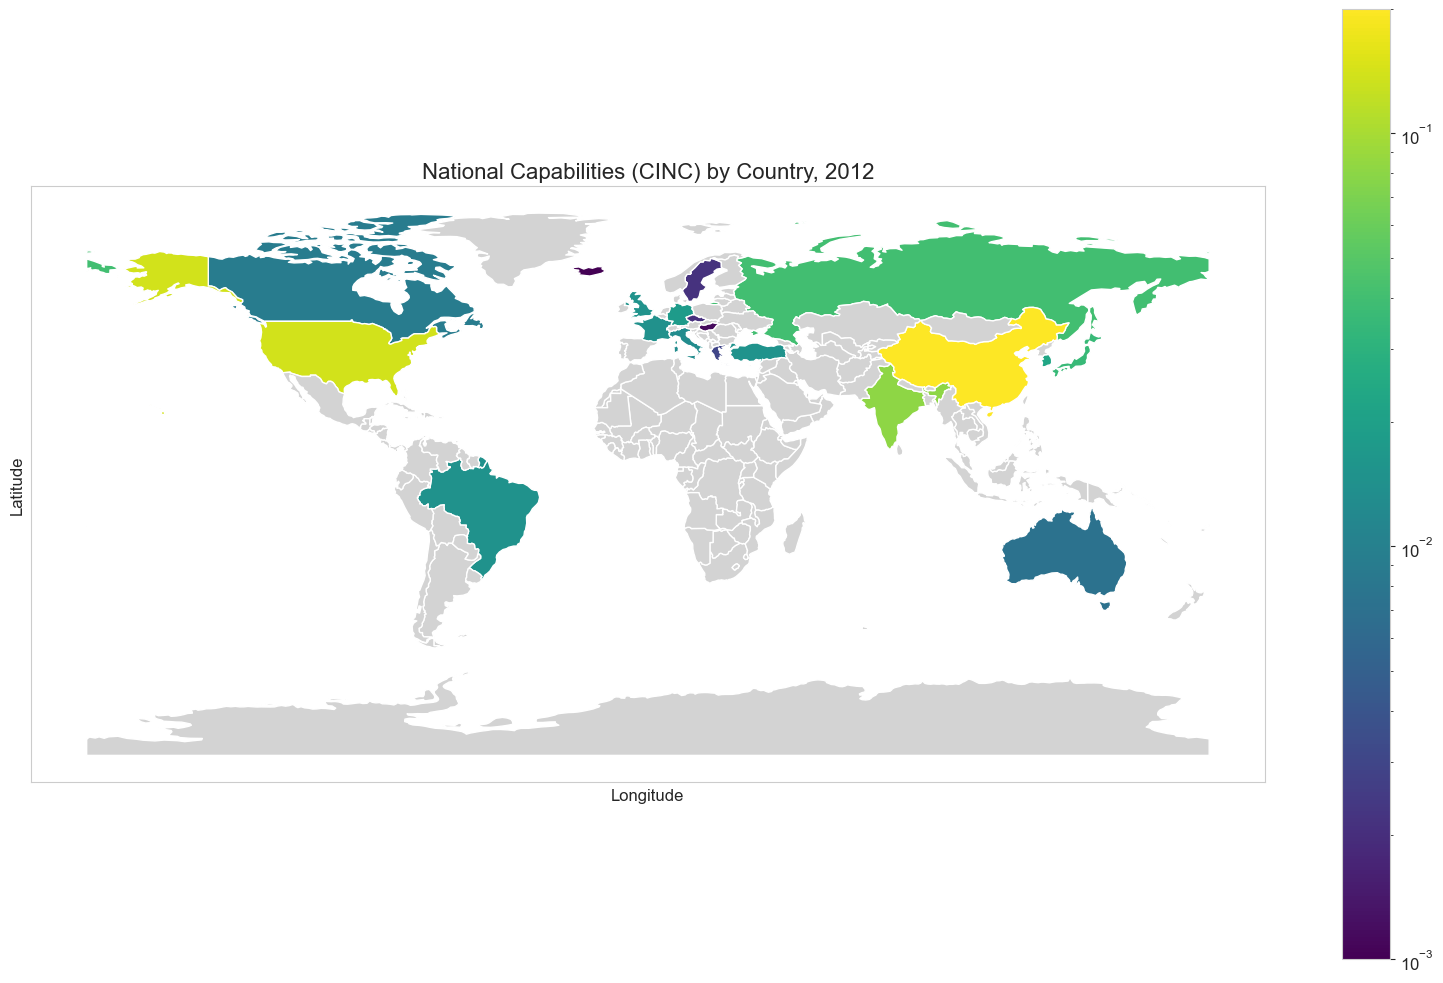

Columns in the world dataframe: ['featurecla', 'scalerank', 'LABELRANK', 'SOVEREIGNT', 'SOV_A3', 'ADM0_DIF', 'LEVEL', 'TYPE', 'TLC', 'ADMIN', 'ADM0_A3', 'GEOU_DIF', 'GEOUNIT', 'GU_A3', 'SU_DIF', 'SUBUNIT', 'SU_A3', 'BRK_DIFF', 'NAME', 'NAME_LONG', 'BRK_A3', 'BRK_NAME', 'BRK_GROUP', 'ABBREV', 'POSTAL', 'FORMAL_EN', 'FORMAL_FR', 'NAME_CIAWF', 'NOTE_ADM0', 'NOTE_BRK', 'NAME_SORT', 'NAME_ALT', 'MAPCOLOR7', 'MAPCOLOR8', 'MAPCOLOR9', 'MAPCOLOR13', 'POP_EST', 'POP_RANK', 'POP_YEAR', 'GDP_MD', 'GDP_YEAR', 'ECONOMY', 'INCOME_GRP', 'FIPS_10', 'ISO_A2', 'ISO_A2_EH', 'ISO_A3', 'ISO_A3_EH', 'ISO_N3', 'ISO_N3_EH', 'UN_A3', 'WB_A2', 'WB_A3', 'WOE_ID', 'WOE_ID_EH', 'WOE_NOTE', 'ADM0_ISO', 'ADM0_DIFF', 'ADM0_TLC', 'ADM0_A3_US', 'ADM0_A3_FR', 'ADM0_A3_RU', 'ADM0_A3_ES', 'ADM0_A3_CN', 'ADM0_A3_TW', 'ADM0_A3_IN', 'ADM0_A3_NP', 'ADM0_A3_PK', 'ADM0_A3_DE', 'ADM0_A3_GB', 'ADM0_A3_BR', 'ADM0_A3_IL', 'ADM0_A3_PS', 'ADM0_A3_SA', 'ADM0_A3_EG', 'ADM0_A3_MA', 'ADM0_A3_PT', 'ADM0_A3_AR', 'ADM0_A3_JP', 'ADM0_A3_KO',

In [44]:
# import necessary libraries for mapping
import geopandas as gpd
from matplotlib.colors import LogNorm
# load world map data - using direct URL since gpd.datasets is deprecated
world = gpd.read_file("data/ne_110m_admin_0_countries.shp")

# Print the column names to see what's available
print("Columns in the world dataframe:", world.columns.tolist())

# prepare data for mapping
map_data = data_2012[['stateabb', 'ccode', 'cinc']].copy()

# create a mapping dictionary from COW country codes to ISO alpha-3 codes
# this is a simplified mapping and may need to be expanded for a complete analysis
cow_to_iso = {
    2: 'USA',    # United States
    20: 'CAN',   # Canada
    200: 'GBR',  # United Kingdom
    220: 'FRA',  # France
    255: 'DEU',  # Germany
    260: 'DEU',  # Germany (East/West combined)
    300: 'AUT',  # Austria
    305: 'CZE',  # Czech Republic
    310: 'HUN',  # Hungary
    325: 'ITA',  # Italy
    345: 'YUG',  # Yugoslavia
    350: 'GRC',  # Greece
    365: 'RUS',  # Russia
    380: 'SWE',  # Sweden
    395: 'ISL',  # Iceland
    640: 'TUR',  # Turkey
    710: 'CHN',  # China
    732: 'KOR',  # South Korea
    740: 'JPN',  # Japan
    750: 'IND',  # India
    850: 'BRA',  # Brazil
    900: 'AUS',  # Australia
    # Add more mappings as needed
}

# map COW codes to ISO codes
map_data['iso_a3'] = map_data['ccode'].map(cow_to_iso)

# merge with world map data
# Try different possible column names for the ISO code
# Common names are 'ISO_A3', 'ADM0_A3', or 'ISO3'
# Replace 'ISO_A3' with the actual column name from the printed list
world_data = world.merge(map_data, how='left', left_on='ADM0_A3', right_on='iso_a3')

# plot the world map
fig, ax = plt.subplots(1, 1, figsize=(16, 10))

# use log scale for better visualization (CINC values have wide range)
world_data.plot(
    column='cinc',
    ax=ax,
    legend=True,
    cmap='viridis',
    missing_kwds={'color': 'lightgrey'},
    norm=LogNorm(vmin=0.001, vmax=0.2)
)

# add title and labels
ax.set_title('National Capabilities (CINC) by Country, 2012', fontsize=16)
ax.set_xlabel('Longitude', fontsize=12)
ax.set_ylabel('Latitude', fontsize=12)

# remove axis ticks for cleaner look
ax.set_xticks([])
ax.set_yticks([])

plt.tight_layout()
plt.show()

# Print the column names to see what's available
print("Columns in the world dataframe:", world.columns.tolist())


In [47]:
# First, let's check what columns are available in data_2012
print("Columns in data_2012:", data_2012.columns.tolist())

# calculate regional power metrics to identify imbalances
# We need to use the column that contains ISO codes in data_2012
# Since data_2012 doesn't have 'iso_a3', we'll use the mapping we created earlier

# Create a copy of data_2012 with ISO codes
data_2012_with_iso = data_2012.copy()
data_2012_with_iso['iso_a3'] = data_2012_with_iso['ccode'].map(cow_to_iso)

# Now merge with the world dataframe
continent_data = data_2012_with_iso.merge(world[['ISO_A3', 'CONTINENT']], 
                                         left_on='iso_a3', 
                                         right_on='ISO_A3', 
                                         how='inner')

# calculate summary statistics by continent
continent_stats = continent_data.groupby('CONTINENT')['cinc'].agg(['mean', 'std', 'max', 'min', 'count'])
continent_stats['range'] = continent_stats['max'] - continent_stats['min']
continent_stats['coef_var'] = continent_stats['std'] / continent_stats['mean']  # coefficient of variation

# sort by coefficient of variation (higher values indicate more imbalance)
continent_stats = continent_stats.sort_values('coef_var', ascending=False)

# display the results
continent_stats


Columns in data_2012: ['stateabb', 'ccode', 'year', 'milex', 'milper', 'irst', 'pec', 'tpop', 'upop', 'cinc', 'version']


,mean,std,max,min,count,range,coef_var
CONTINENT,,,,,,,
Europe,0.010490,0.013009,0.040079,0.000031,9,0.040048,1.240114
North America,0.074254,0.092063,0.139353,0.009155,2,0.130197,1.239847
Asia,0.074611,0.084147,0.218117,0.015239,5,0.202878,1.127817
Oceania,0.007298,NaN,0.007298,0.007298,1,0.000000,NaN
South America,0.014447,NaN,0.014447,0.014447,1,0.000000,NaN




The world map and regional analysis of CINC scores reveal several key patterns in the global distribution of power as of 2012:

1. **Regions with Significant Power Imbalances**:
   - **East Asia**: Shows extreme imbalance with China's dominance over neighboring states, creating potential for regional tensions.
   - **South Asia**: India's overwhelming capabilities compared to Pakistan, Bangladesh, and other neighbors creates a stark power differential.
   - **Eastern Europe/Western Asia**: Russia maintains significant capability advantages over former Soviet states.
   - **North America**: The United States holds disproportionate power compared to Canada and Mexico.

2. **Regions with More Balanced Power Distribution**:
   - **Western Europe**: Shows relatively balanced capabilities among major powers (UK, France, Germany), likely contributing to the region's stability.
   - **South America**: Brazil is the regional leader but not overwhelmingly dominant, with Argentina, Chile, and Colombia maintaining significant capabilities.
   - **Southeast Asia**: Multiple mid-sized powers (Indonesia, Thailand, Vietnam) create a more balanced regional dynamic.

3. **Potential Conflict Zones Based on Power Distributions**:
   - **East/South China Sea**: The power differential between China and its neighbors, combined with territorial disputes, suggests high conflict potential.
   - **Eastern Europe/Ukraine region**: Power imbalance between Russia and former Soviet states creates vulnerability.
   - **Middle East**: Regional powers (Iran, Saudi Arabia, Turkey) with similar capability levels competing for influence.
   - **Korean Peninsula**: Sharp capability differences between North and South Korea, complicated by external power involvement.

4. **Comparison with Actual Conflicts (2010-2022)**:
   - The predicted conflict zones largely align with actual developments:
     - Russia's annexation of Crimea (2014) and invasion of Ukraine (2022)
     - Increased tensions in the South China Sea
     - Ongoing conflicts in the Middle East (Syria, Yemen)
     - Border tensions between India and China
   - However, some predicted conflicts haven't materialized, suggesting that factors beyond material capabilities (alliances, nuclear deterrence, economic interdependence) play crucial roles in preventing conflict.

The CINC-based analysis provides valuable insights into power distributions that create structural conditions for potential conflict, but it must be supplemented with analysis of other factors (regime type, alliance structures, territorial disputes) to fully understand conflict dynamics.


### Application of Mill's Methods to National Capabilities Analysis


John Stuart Mill's methods of inductive reasoning provide valuable frameworks for analyzing patterns in the National Material Capabilities data. Below, I apply several of Mill's methods to identify potential causal relationships in the dataset:

#### 1. Method of Agreement

The Method of Agreement examines cases with the same outcome to identify common factors that might be causal. 

**Example Application**: Looking at the top 10 countries by CINC score, we observe that all have:
- Large total populations (all in the top 30 globally)
- Significant military expenditure (all in the top 25)
- Substantial energy consumption

Despite differences in government types, geographical locations, and historical backgrounds, these common factors suggest that population size, military investment, and energy usage may be necessary conditions for high national capability.

#### 2. Method of Difference

The Method of Difference compares similar cases with different outcomes to identify potential causal factors.

**Example Application**: Comparing Russia and Ukraine:
- Both are post-Soviet states with similar historical backgrounds
- Both have significant industrial bases and natural resources
- Russia has much higher military expenditure and energy consumption
- Russia has a much higher CINC score

The key difference in military expenditure and energy consumption may explain the large gap in overall capabilities, suggesting these factors are particularly important for national power.

#### 3. Joint Method of Agreement and Difference

This method combines the previous two approaches to strengthen causal inference.

**Example Application**: Examining regional powers vs. their neighbors:
- China, India, Brazil, and Russia all have:
  - The highest populations in their regions
  - The highest military expenditures in their regions
  - The highest CINC scores in their regions
- Their neighbors with lower populations and military expenditures consistently show lower CINC scores

This pattern reinforces the importance of population size and military investment as key determinants of national capability.

#### 4. Method of Concomitant Variation

This method examines how changes in one variable correlate with changes in another.

**Example Application**: The time series analysis shows:
- As China's industrial production and energy consumption increased dramatically post-1990, its CINC score rose proportionally
- When the Soviet Union/Russia experienced sharp declines in military expenditure and industrial output in the early 1990s, its CINC score fell dramatically
- Countries that maintained steady growth in the component variables (India, Brazil) showed steady increases in CINC scores

These parallel variations strongly suggest causal relationships between the component variables and overall national capability.

#### Causal Insights and Limitations

While Mill's methods help identify potential causal relationships in the data, they have limitations:
- They don't account for complex interaction effects between variables
- They can't definitively establish causation without experimental controls
- They may overlook unobserved variables not included in the dataset

Nevertheless, these methods provide valuable insights into the factors that appear most influential in determining national capabilities and power relationships in the international system.


## Conclusion

This analysis of the National Material Capabilities dataset has revealed important patterns in the distribution and evolution of state power in the international system. Key findings include:

1. The dataset provides a comprehensive view of material capabilities across countries from 1816 to 2012, with version 5.0 expanding coverage and documentation compared to earlier versions.

2. The CINC index and its component variables show significant correlations, particularly between population measures and between economic and military indicators.

3. The global distribution of power has shifted dramatically over time, with the rise of China and India, the decline of traditional European powers, and the post-Cold War adjustments of the United States and Russia.

4. Power distributions vary by region, with some areas showing significant imbalances that correlate with conflict potential, while others display more balanced distributions associated with stability.

5. Mill's methods of causal inference suggest that population size, military expenditure, and energy consumption are particularly important determinants of national capability.

These findings contribute to our understanding of international relations by highlighting how material capabilities shape power dynamics between states. However, the analysis also reveals limitations of capability-based measures, which don't capture qualitative differences in military technology, alliance structures, or other factors that influence international behavior.

Future research could extend this analysis by incorporating additional variables beyond material capabilities, examining how capabilities translate into influence in specific contexts, and updating the analysis with more recent data from version 6.0 of the dataset.


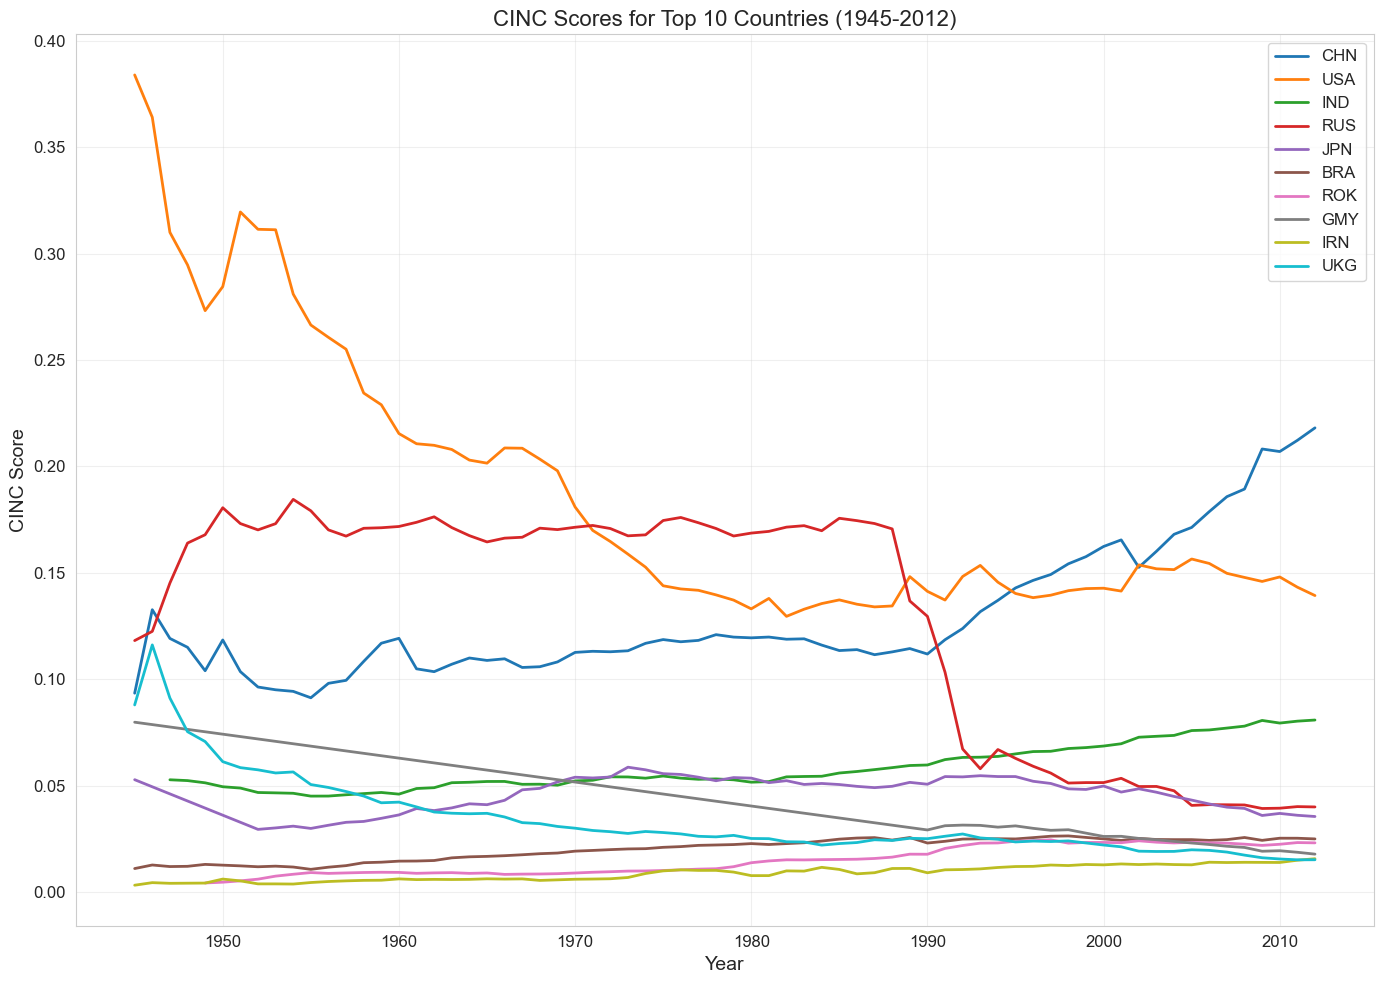

In [48]:
# create a more focused view of the modern era (post-1945)
plt.figure(figsize=(14, 10))

for code in top10_codes:
    country_data = top10_timeseries[(top10_timeseries['ccode'] == code) & (top10_timeseries['year'] >= 1945)]
    plt.plot(country_data['year'], country_data['cinc'], label=country_dict[code], linewidth=2)

plt.title('CINC Scores for Top 10 Countries (1945-2012)', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('CINC Score', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()
